In [9]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import learning_curve
import numpy as np
import random
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

df = pd.read_csv("processed_food_delivery.csv")
print(df.head())

   Unnamed: 0  Age  Gender  Marital Status  Occupation  Monthly Income  \
0           0   20       1               1           0               0   
1           1   24       1               1           0               1   
2           2   22       0               1           0               1   
3           3   22       1               1           0               0   
4           4   22       0               1           0               1   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

   Output  
0       1  
1       1  
2       1  
3       1  
4       1  


In [10]:

X = df.drop('Output',axis=1)
y = df['Output']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=50)

print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (310, 11)
Shape of test dataset :  (78, 11)


Score:  0.7096774193548387
Recall:  0.8604651162790697
Precision:  0.7551020408163265
Accuracy:  0.7096774193548387
F1 Score:  0.8043478260869564
Confusion Matrix: 
[[ 7  6]
 [12 37]]


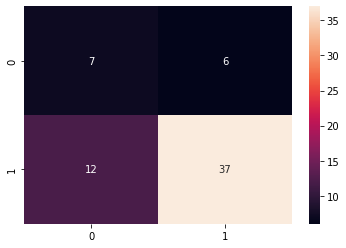

In [11]:
#1. Naive Bayes
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=5) 
#change X and y to X_train, y_train
#^ change to train_x, val_x, train_y, val_y
#cross validation: k = 3 or 5
#print out validation results
#hyper parameter testing
#learning curve, predict for training data too: y_pred = gnb_predict(trainX)
#at the end use the testing data
gnb = GaussianNB()
gnb.fit(train_x, train_y)
print("Score: ", gnb.score(val_x, val_y))
y_pred = gnb.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.7903225806451613
Recall:  0.8653846153846154
Precision:  0.8823529411764706
Accuracy:  0.7903225806451613
F1 Score:  0.8737864077669903
Confusion Matrix: 
[[ 4  7]
 [ 6 45]]


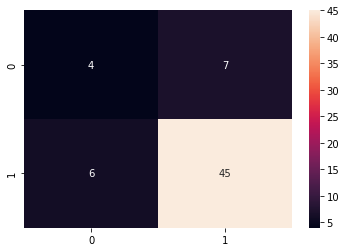

In [12]:
#1. Naive Bayes
#10 random state
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=10)
gnb = GaussianNB()
gnb.fit(train_x, train_y)
print("Score: ", gnb.score(val_x, val_y))
y_pred = gnb.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.7580645161290323
Recall:  0.8461538461538461
Precision:  0.8627450980392157
Accuracy:  0.7580645161290323
F1 Score:  0.854368932038835
Confusion Matrix: 
[[ 3  8]
 [ 7 44]]


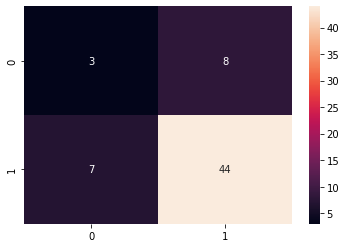

In [13]:
#1. Naive Bayes
#50 random state
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=50)
gnb = GaussianNB()
gnb.fit(train_x, train_y)
print("Score: ", gnb.score(val_x, val_y))
y_pred = gnb.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.6612903225806451
Recall:  0.7755102040816326
Precision:  0.7916666666666666
Accuracy:  0.6612903225806451
F1 Score:  0.7835051546391752
Confusion Matrix: 
[[ 3 11]
 [10 38]]


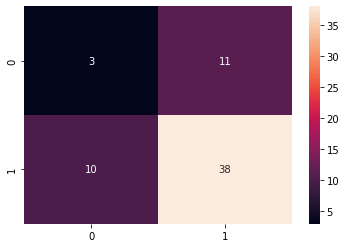

In [15]:
#2. KNN n nearest
#3 neighbors

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=20)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
print("Score: ", knn.score(val_x, val_y))
y_pred = knn.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.5806451612903226
Recall:  0.6530612244897959
Precision:  0.7804878048780488
Accuracy:  0.5806451612903226
F1 Score:  0.711111111111111
Confusion Matrix: 
[[ 4 17]
 [ 9 32]]


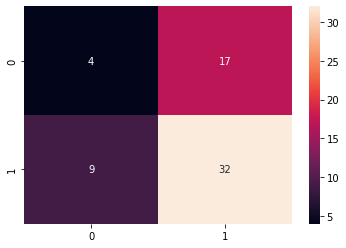

In [16]:
#2. KNN n nearest
#4 neighbors

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=20)

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(train_x, train_y)
print("Score: ", knn.score(val_x, val_y))
y_pred = knn.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.7580645161290323
Recall:  0.9183673469387755
Precision:  0.8035714285714286
Accuracy:  0.7580645161290323
F1 Score:  0.8571428571428571
Confusion Matrix: 
[[ 2  4]
 [11 45]]


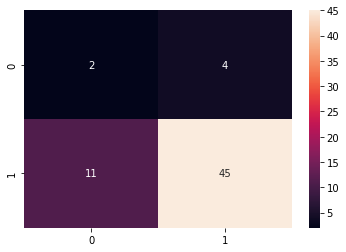

In [17]:
#2. KNN n nearest
#5 neighbors

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=20)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x, train_y)
print("Score: ", knn.score(val_x, val_y))
y_pred = knn.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

In [42]:
#Kneighbors cross validation

knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)
knn_gscv.best_params_

[0.78205128 0.24358974 0.20512821 0.33766234 0.48051948]
cv_scores mean:0.40979020979020975


{'n_neighbors': 24}

Score:  0.7903225806451613
Recall:  1.0
Precision:  0.7903225806451613
Accuracy:  0.7903225806451613
F1 Score:  0.8828828828828829
Confusion Matrix: 
[[ 0  0]
 [13 49]]


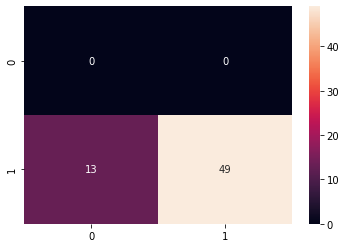

In [43]:
#2. KNN n nearest
#24 neighbors

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=20)

knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(train_x, train_y)
print("Score: ", knn.score(val_x, val_y))
y_pred = knn.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.6935483870967742
Recall:  1.0
Precision:  0.6935483870967742
Accuracy:  0.6935483870967742
F1 Score:  0.8190476190476191
Confusion Matrix: 
[[ 0  0]
 [19 43]]


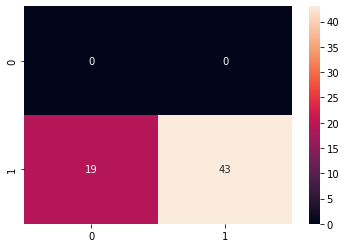

In [44]:
#3. Support vector machine
#5 random state
from sklearn import svm

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

clf = svm.SVC()
clf.fit(train_x, train_y)
print("Score: ", clf.score(val_x, val_y))
y_pred = clf.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.8387096774193549
Recall:  1.0
Precision:  0.8387096774193549
Accuracy:  0.8387096774193549
F1 Score:  0.9122807017543859
Confusion Matrix: 
[[ 0  0]
 [10 52]]


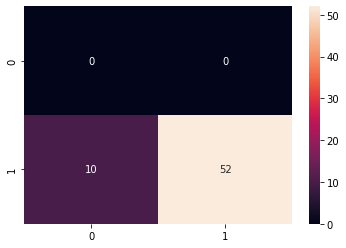

In [19]:
#3. Support vector machine
#10 random state
from sklearn import svm

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state= 10)

clf = svm.SVC()
clf.fit(train_x, train_y)
print("Score: ", clf.score(val_x, val_y))
y_pred = clf.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.8387096774193549
Recall:  1.0
Precision:  0.8387096774193549
Accuracy:  0.8387096774193549
F1 Score:  0.9122807017543859
Confusion Matrix: 
[[ 0  0]
 [10 52]]


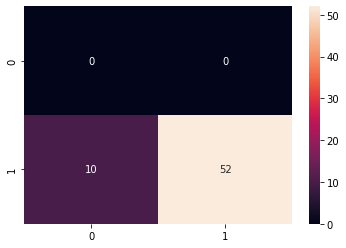

In [20]:
#3. Support vector machine
#50 random state
from sklearn import svm

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

clf = svm.SVC()
clf.fit(train_x, train_y)
print("Score: ", clf.score(val_x, val_y))
y_pred = clf.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.6410256410256411
Recall:  0.8
Precision:  0.7213114754098361
Accuracy:  0.6410256410256411
F1 Score:  0.7586206896551724
Confusion Matrix: 
[[ 6 11]
 [17 44]]


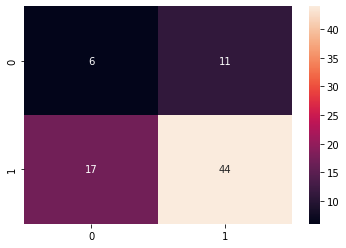

In [21]:
#4. Decision Tree with entropy
#5 random state

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=5)

clf = DecisionTreeClassifier(criterion='entropy').fit(train_x, train_y)

train_score = clf.score(train_x, train_y)
test_score = clf.score(val_x, val_y)

print("Score: ", clf.score(val_x, val_y))
y_pred = clf.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.8205128205128205
Recall:  0.9206349206349206
Precision:  0.8656716417910447
Accuracy:  0.8205128205128205
F1 Score:  0.8923076923076922
Confusion Matrix: 
[[ 6  5]
 [ 9 58]]


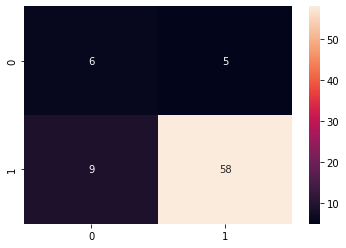

In [22]:
#4. Decision Tree with entropy
#10 random state

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=10)

clf = DecisionTreeClassifier(criterion='entropy').fit(train_x, train_y)

train_score = clf.score(train_x, train_y)
test_score = clf.score(val_x, val_y)

print("Score: ", clf.score(val_x, val_y))
y_pred = clf.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.7692307692307693
Recall:  0.835820895522388
Precision:  0.8888888888888888
Accuracy:  0.7692307692307693
F1 Score:  0.8615384615384615
Confusion Matrix: 
[[ 4 11]
 [ 7 56]]


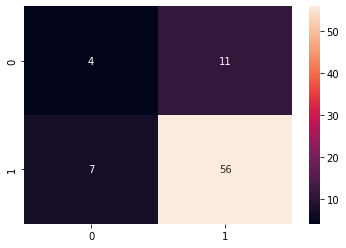

In [23]:
#4. Decision Tree with entropy
#50 random state

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=50)

clf = DecisionTreeClassifier(criterion='entropy').fit(train_x, train_y)

train_score = clf.score(train_x, train_y)
test_score = clf.score(val_x, val_y)

print("Score: ", clf.score(val_x, val_y))
y_pred = clf.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.717948717948718
Recall:  0.8909090909090909
Precision:  0.7538461538461538
Accuracy:  0.717948717948718
F1 Score:  0.8166666666666667
Confusion Matrix: 
[[ 7  6]
 [16 49]]


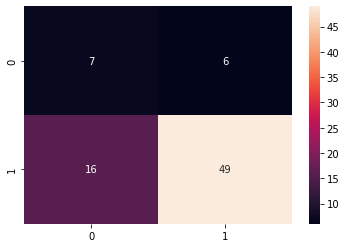

In [24]:
#5. Decision Tree with gini
#5 random state

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=5)

clf = DecisionTreeClassifier(criterion='gini').fit(train_x, train_y)

train_score = clf.score(train_x, train_y)
test_score = clf.score(val_x, val_y)

print("Score: ", clf.score(val_x, val_y))
y_pred = clf.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.8205128205128205
Recall:  0.9206349206349206
Precision:  0.8656716417910447
Accuracy:  0.8205128205128205
F1 Score:  0.8923076923076922
Confusion Matrix: 
[[ 6  5]
 [ 9 58]]


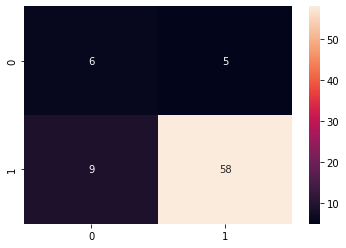

In [25]:
#5. Decision Tree with gini
#10 random state

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=10)

clf = DecisionTreeClassifier(criterion='gini').fit(train_x, train_y)

train_score = clf.score(train_x, train_y)
test_score = clf.score(val_x, val_y)

print("Score: ", clf.score(val_x, val_y))
y_pred = clf.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.782051282051282
Recall:  0.8507462686567164
Precision:  0.890625
Accuracy:  0.782051282051282
F1 Score:  0.8702290076335878
Confusion Matrix: 
[[ 4 10]
 [ 7 57]]


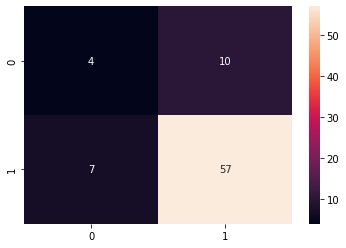

In [26]:
#5. Decision Tree with gini
#50 random state

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=50)

clf = DecisionTreeClassifier(criterion='gini').fit(train_x, train_y)

train_score = clf.score(train_x, train_y)
test_score = clf.score(val_x, val_y)

print("Score: ", clf.score(val_x, val_y))
y_pred = clf.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.7692307692307693
Recall:  0.9818181818181818
Precision:  0.7605633802816901
Accuracy:  0.7692307692307693
F1 Score:  0.8571428571428571
Confusion Matrix: 
[[ 6  1]
 [17 54]]


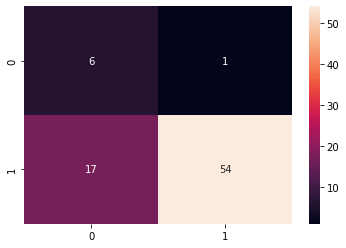

In [27]:
#6. Random Forest
# 5 random state

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=5)
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(train_x, train_y)

print("Score: ", rfc.score(val_x, val_y))
y_pred = rfc.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.7435897435897436
Recall:  1.0
Precision:  0.7333333333333333
Accuracy:  0.7435897435897436
F1 Score:  0.846153846153846
Confusion Matrix: 
[[ 3  0]
 [20 55]]


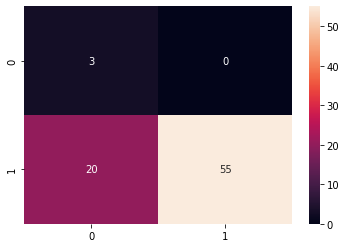

In [28]:
#6. Random Forest
#10 random state, 500 n_estimators

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=5)
rfc = RandomForestClassifier(n_estimators=500)

rfc.fit(train_x, train_y)

print("Score: ", rfc.score(val_x, val_y))
y_pred = rfc.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

Score:  0.7564102564102564
Recall:  1.0
Precision:  0.7432432432432432
Accuracy:  0.7564102564102564
F1 Score:  0.8527131782945736
Confusion Matrix: 
[[ 4  0]
 [19 55]]


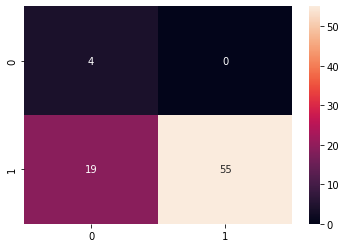

In [29]:
#6. Random Forest
#50 random state, 1000 n_estimators

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=5)
rfc = RandomForestClassifier(n_estimators=1000)

rfc.fit(train_x, train_y)

print("Score: ", rfc.score(val_x, val_y))
y_pred = rfc.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

In [30]:
#GridSearch

parameters = {
    'randomforestclassifier__n_estimators': (20, 50, 100)
}

pipeline = make_pipeline(RandomForestClassifier())
pipeline
gridsearch = GridSearchCV(pipeline, parameters, verbose=1, n_jobs= -1)
gridsearch.fit(train_x, train_y)

print("Best score %0.3f" % gridsearch.best_score_)
print("Best parameters set: ")
best_parameters = gridsearch.best_estimator_.get_params()

for params in sorted(parameters.keys()):
    print("\t%s: %r" % (params, best_parameters[params]))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best score 0.845
Best parameters set: 
	randomforestclassifier__n_estimators: 100


Score:  0.8461538461538461
Recall:  0.9117647058823529
Precision:  0.9117647058823529
Accuracy:  0.8461538461538461
F1 Score:  0.9117647058823528
Confusion Matrix: 
[[ 4  6]
 [ 6 62]]


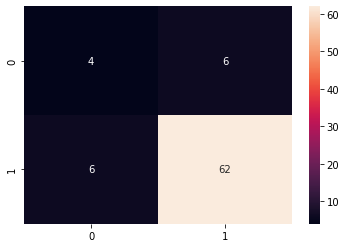

In [50]:
#6. Random Forest
# 5 random state

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, random_state=11)
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(train_x, train_y)

print("Score: ", rfc.score(val_x, val_y))
y_pred = rfc.predict(val_x)
print("Recall: ", recall_score(val_y, y_pred))
print("Precision: ", precision_score(val_y, y_pred))
print("Accuracy: ", accuracy_score(val_y, y_pred))
print("F1 Score: ", f1_score(val_y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_pred,val_y))
sns.heatmap(confusion_matrix(y_pred,val_y), annot=True);

In [31]:
#Model Testing with Random Forest

r = random.randint(0,len(df))
print(r)
new_customer = df.drop('Output', axis=1).iloc[r]
new_customer

166


Unnamed: 0                       166.0000
Age                               27.0000
Gender                             1.0000
Marital Status                     1.0000
Occupation                         0.0000
Monthly Income                     0.0000
Educational Qualifications         3.0000
Family size                        5.0000
latitude                          13.0503
longitude                         77.5529
Pin code                      560013.0000
Name: 166, dtype: float64

In [32]:
rfc.predict(new_customer.values.reshape(1,11)) # predicted output

/Users/titusgoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [33]:
df.iloc[r]['Output'] # actual Output

0.0